In [684]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler,Normalizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, f1_score, roc_curve, confusion_matrix, log_loss, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.manifold import TSNE,Isomap,LocallyLinearEmbedding
from sklearn.decomposition import NMF



In [663]:
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(context='notebook', palette='viridis')

In [664]:
df = pd.read_csv('WineQT.csv', sep=',')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [665]:
df.shape

(1143, 13)

In [666]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [667]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [668]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [669]:
df.duplicated().sum()

0

In [670]:
df.drop(columns="Id",inplace=True)

In [671]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [672]:
df['quality'] = (df['quality'] > 5).astype(int)

In [673]:
numerical_data = df.columns.tolist()
numerical_data.remove('quality')
print(numerical_data)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


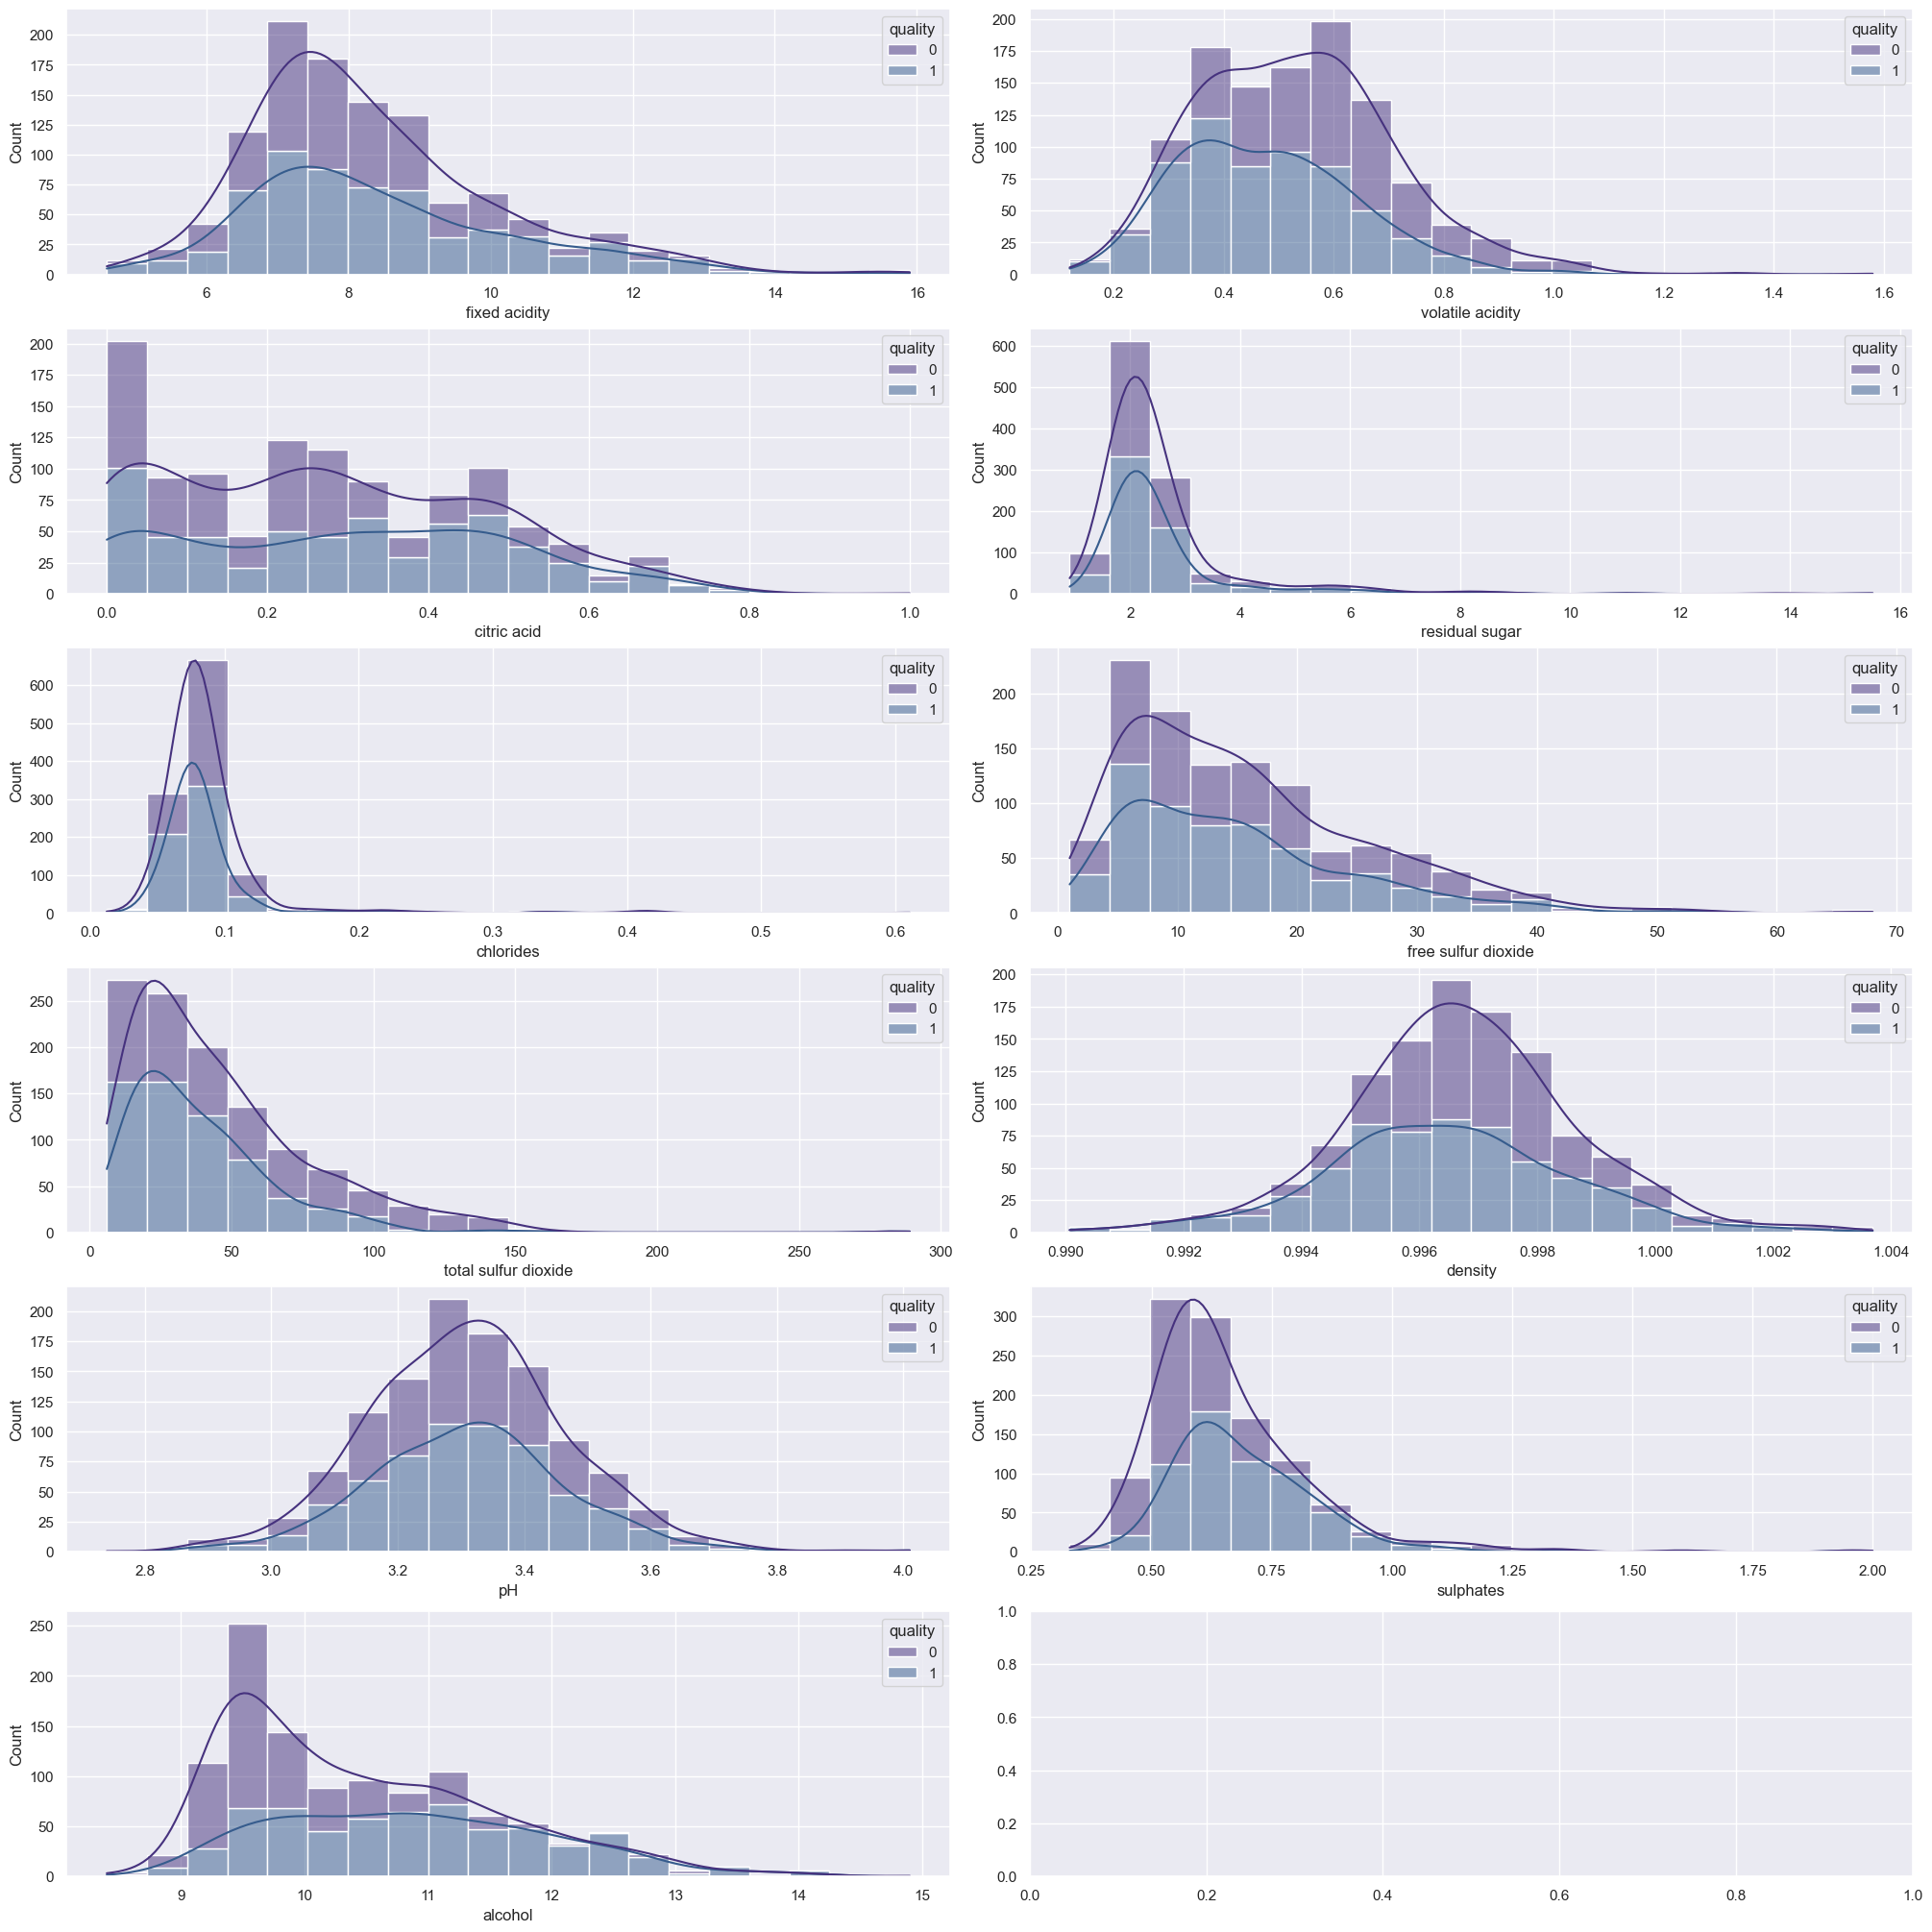

In [674]:
fig, axs = plt.subplots(len(numerical_data)//2 + 1, 2,
                        figsize=(20, 20), constrained_layout=True)

for i, f in enumerate(numerical_data):
    sns.histplot(x=f, data=df, hue='quality', multiple='stack', kde=True,
                 ax=axs[i//2][i % 2], bins=20,
                 palette=sns.color_palette("viridis", 6))

plt.show()

In [675]:
ave_qu = df.groupby("quality").mean()
ave_qu

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
0,8.142146,0.596121,0.235096,2.543582,0.092117,16.404215,54.016284,0.997054,3.308410,0.614195,9.922510
1,8.453140,0.476884,0.296329,2.522544,0.082575,14.952496,39.104670,0.996458,3.313205,0.694283,10.878878


<Axes: xlabel='quality'>

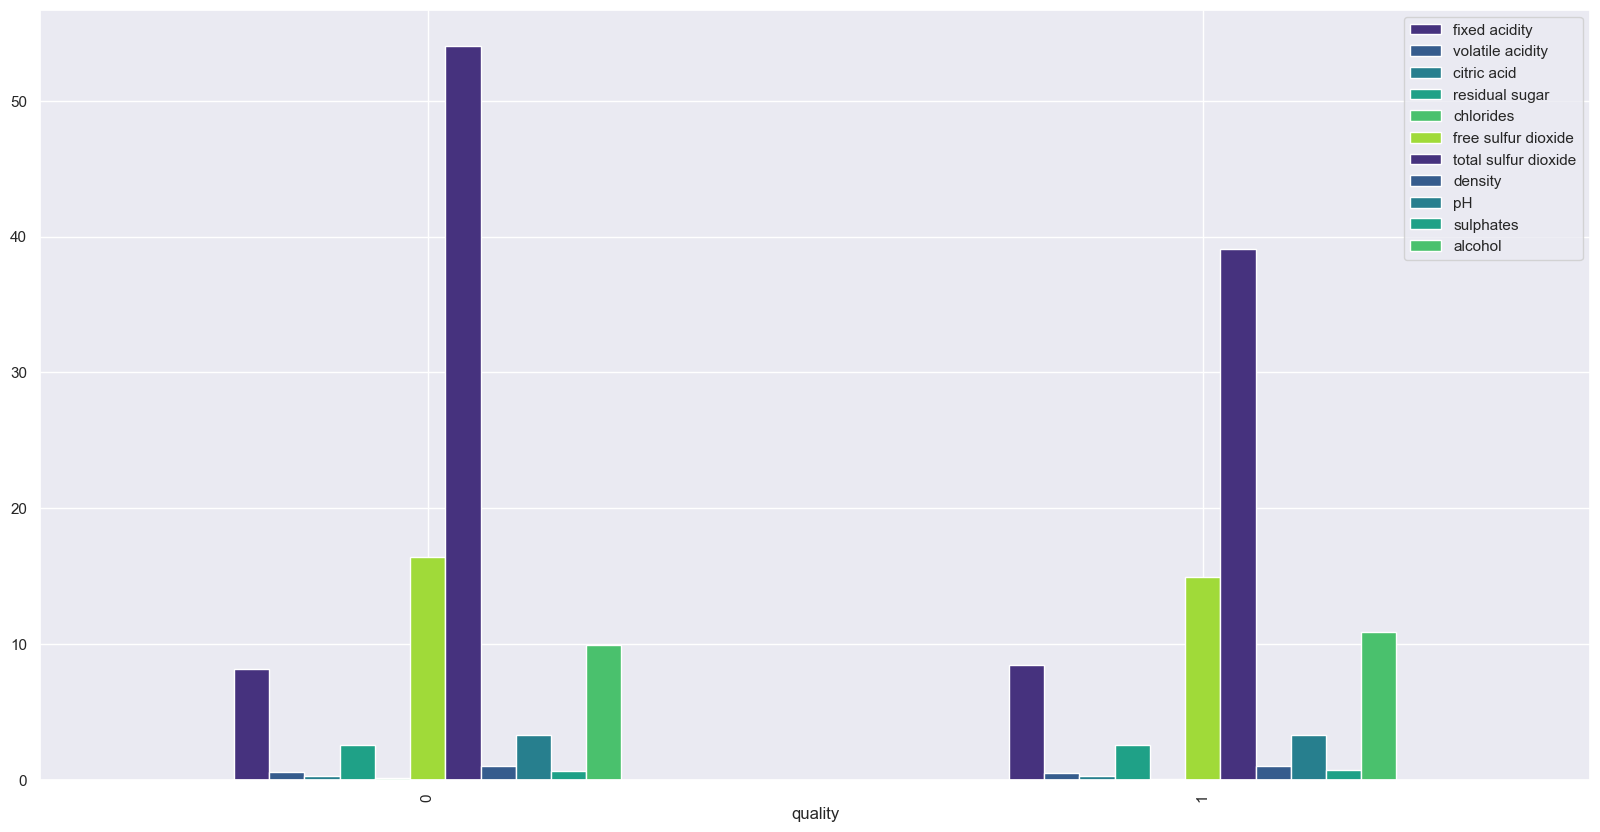

In [676]:
ave_qu.plot(kind="bar",figsize=(20,10))

<Axes: xlabel='quality', ylabel='count'>

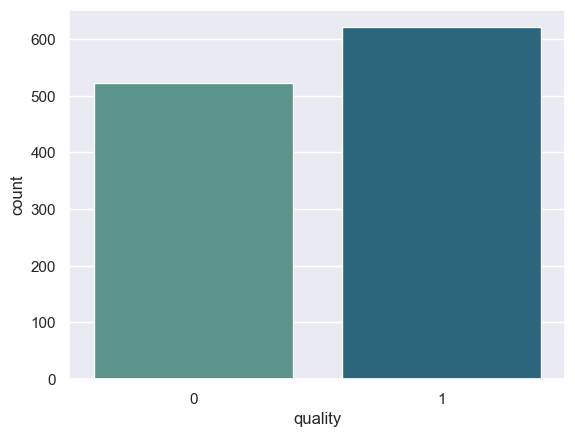

In [677]:
fig, ax = plt.subplots()

sns.countplot(x='quality', data=df,
              palette=sns.color_palette("crest", 2))

In [678]:
scaler = StandardScaler()
df2 = df.copy()
df[numerical_data] = scaler.fit_transform(df[numerical_data])

In [634]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382,0
1,-0.292593,1.941813,-1.365027,0.050060,0.234247,0.915920,0.643477,0.036165,-0.708928,0.130881,-0.593601,0
2,-0.292593,1.273492,-1.161568,-0.171289,0.107253,-0.060071,0.246745,0.140103,-0.325775,-0.045254,-0.593601,0
3,1.653789,-1.399789,1.483400,-0.466421,-0.252560,0.135127,0.429852,0.659792,-0.964363,-0.456235,-0.593601,1
4,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382,0


In [635]:
X = df.drop('quality', axis=1)
y = df['quality']

In [636]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y)

results = pd.DataFrame(
    columns=["Algorithm",  "CV-AUC", "CV-Accuracy", "CV-F1",
             "AUC", "Accuracy", "F1",])
results.set_index('Algorithm', inplace=True)

<Axes: xlabel='quality', ylabel='count'>

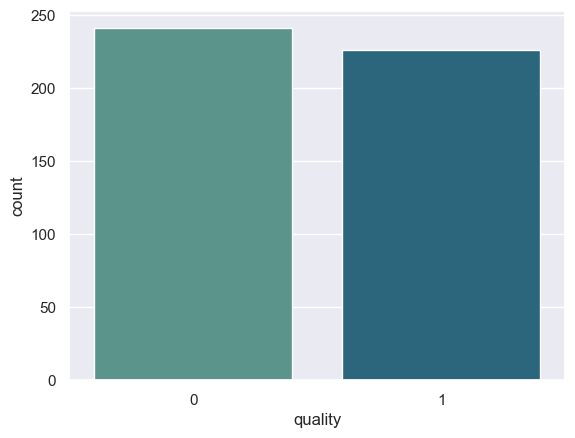

In [637]:
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)
sns.countplot(x=y_resampled, palette=sns.color_palette("crest", 2))

In [638]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    if isinstance(cmap, str):
        cmap = plt.get_cmap(cmap)
    new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap


cmap_base = 'inferno'
vmin, vmax = 0.4, 0.9
cmap = truncate_colormap(cmap_base, vmin, vmax)

In [639]:
def test_models(classifiers, X_train, X_test, y_train, y_test, results):

    sns.set_palette('hls')
    confusion_matrix_fig, confusion_matrix_ax =\
        plt.subplots(1, len(classifiers), figsize=(
            15, 4), constrained_layout=True,)
    all_curves_fig, all_curves_ax = plt.subplots(figsize=(10, 10))
    for i, name in enumerate(classifiers):
        classifier = classifiers[name]
        classifier.fit(X_train, y_train)

        if hasattr(classifier, 'predict_proba'):
            y_pred_prob = classifier.predict_proba(X_test)[:, 1]
        elif hasattr(classifier, 'decision_function'):
            decision_function = classifier.decision_function(X_test)
            y_pred_prob = 1 / (1 + np.exp(-decision_function))
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)

        print(name+':DONE', end='; ')

        pred = classifier.predict(X_test)
        f1 = f1_score(y_test, pred)
        acc = accuracy_score(y_test, pred)

        results.loc[name, "F1"] = f1
        results.loc[name, "AUC"] = roc_auc
        results.loc[name, "Accuracy"] = acc

        all_curves_ax.plot(fpr, tpr, lw=2,
                           label=f'{name} (AUC = {roc_auc:.2f})')

        cm = confusion_matrix(y_test, pred)
        ConfusionMatrixDisplay(cm).plot(
            ax=confusion_matrix_ax[i], colorbar=False, cmap=cmap)
        confusion_matrix_ax[i].grid(False)
        confusion_matrix_ax[i].set_title(name)

    all_curves_ax.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    all_curves_ax.set_title('All ROC Curves')
    all_curves_ax.set_xlabel('False Positive Rate')
    all_curves_ax.set_ylabel('True Positive Rate')
    all_curves_ax.legend(loc='lower right')
    all_curves_fig.show()
    confusion_matrix_fig.show()
    results.sort_values(by='AUC', ascending=False)
    return results

In [640]:
from sklearn.model_selection import cross_validate


def cross_validate_models(classifiers, X, y, cv=5, results=results):
    for name in classifiers:
        print(f"{name}... ", end="")
        classifier = classifiers[name]
        scoring_metrics = ['accuracy', 'f1', 'roc_auc']
        cv_results = cross_validate(
            classifier, X, y, cv=cv, scoring=scoring_metrics)
        acc = cv_results['test_accuracy'].mean()
        f1 = cv_results['test_f1'].mean()
        auc = cv_results['test_roc_auc'].mean()
        results.loc[name, 'CV-F1'] = f1
        results.loc[name, 'CV-AUC'] = auc
        results.loc[name, 'CV-Accuracy'] = acc

SVC... LogisticRegression... SVC:DONE; LogisticRegression:DONE; 

,CV-AUC,CV-Accuracy,CV-F1,AUC,Accuracy,F1
Algorithm,,,,,,
LogisticRegression,0.822316,0.760375,0.779029,0.817972,0.742358,0.759184
SVC,0.839279,0.760361,0.776882,0.808525,0.751092,0.765432


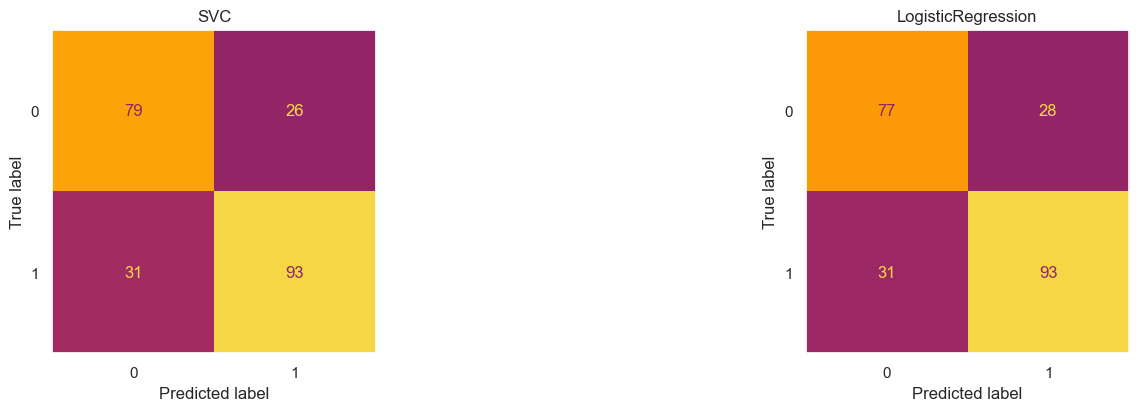

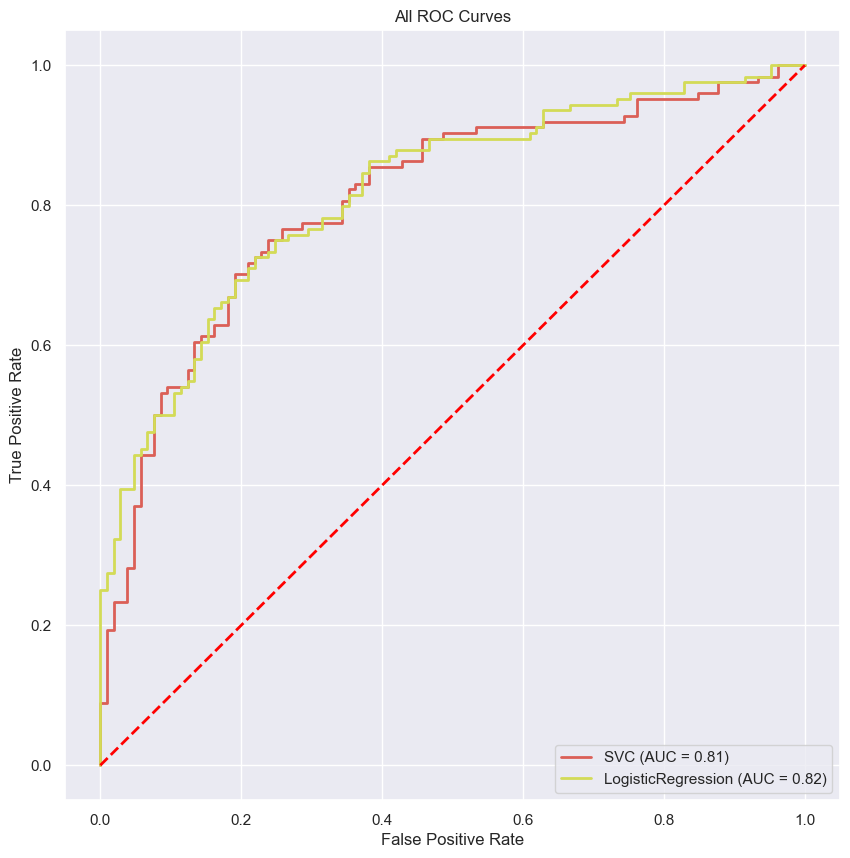

In [641]:
classifiers = {
    'SVC': SVC(),
    'LogisticRegression' : LogisticRegression()
}

classifiers_cv = {
    'SVC': SVC(),
    'LogisticRegression' : LogisticRegression()
}

cross_validate_models(classifiers_cv, X_train,
                      y_train, results=results, cv=3)
results = test_models(classifiers, X_train, X_test, y_train, y_test, results)
results.sort_values(by='AUC', ascending=False)


SVC... LogisticRegression... SVC:DONE; LogisticRegression:DONE; 

,CV-AUC,CV-Accuracy,CV-F1,AUC,Accuracy,F1
Algorithm,,,,,,
LogisticRegression,0.984625,0.957141,0.955248,0.814516,0.733624,0.740426
SVC,0.993668,0.965715,0.964414,0.787097,0.716157,0.728033


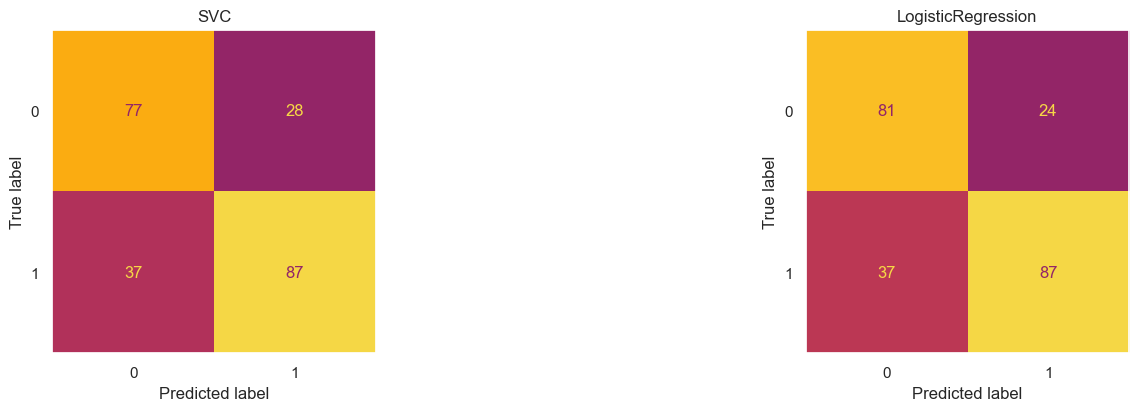

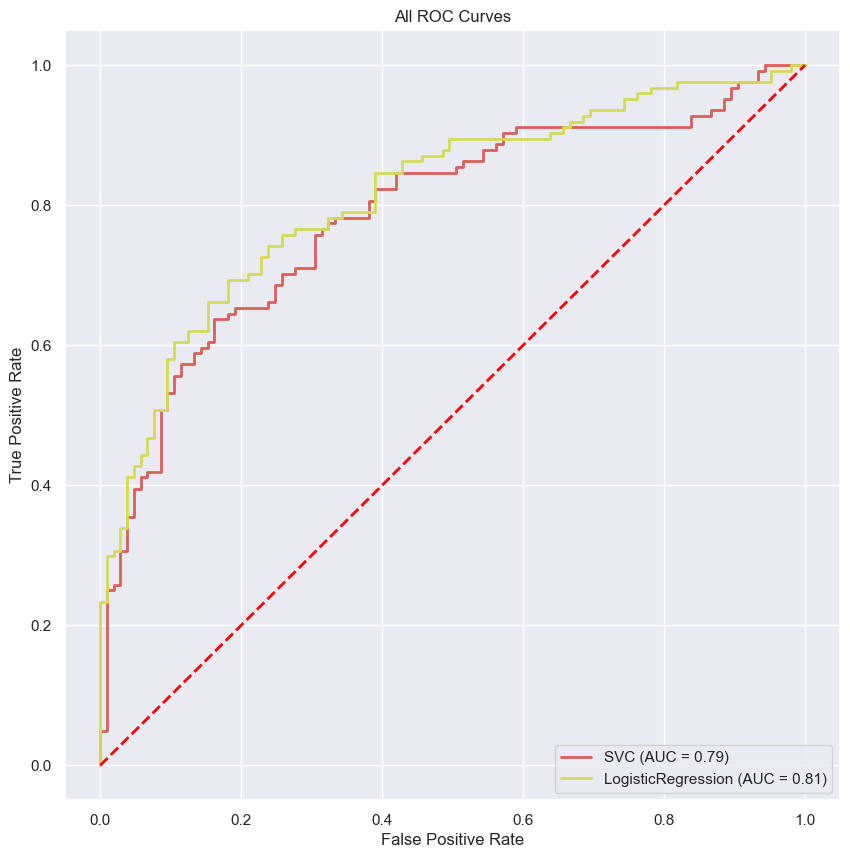

In [642]:
cross_validate_models(classifiers_cv, X_resampled,
                      y_resampled, results=results, cv=3)
results = test_models(classifiers, X_resampled, X_test, y_resampled, y_test, results)
results.sort_values(by='AUC', ascending=False)

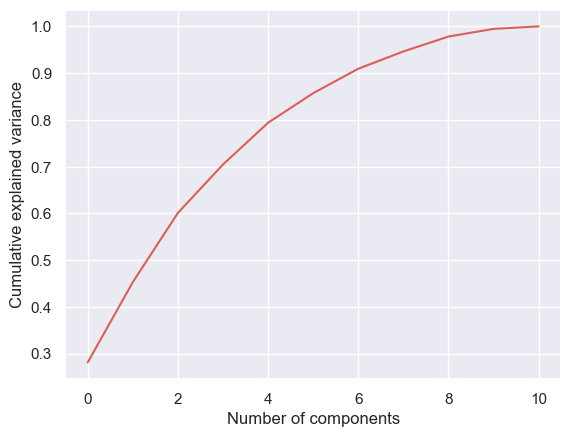

In [643]:
from sklearn.decomposition import PCA

#n_components - postavljen na vrednost vecu od 1 vraca navedeni broj komponenata, izmedju 0 i 1 vraca navadenu vrednost varijanse
#whiten - vrednosti glavnih komponenti se svode na srednju vrednost a varijansa na jedinicnu
#svd_solver - pozivanje stohastickog algoritma

pca = PCA(random_state=42)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

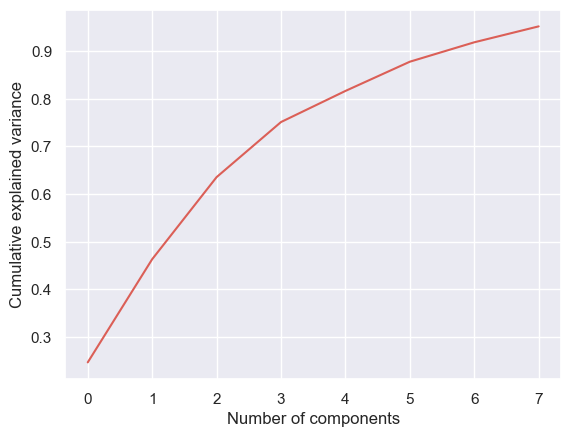

In [644]:
pca = PCA(n_components=0.95, whiten=True,random_state=42)
X_pca_train = pca.fit_transform(X_resampled)
X_pca_test = pca.transform(X_test)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [645]:
X_pca_train.shape

(467, 8)

SVC + PCA... LogisticRegression + PCA... SVC + PCA:DONE; LogisticRegression + PCA:DONE; 

,CV-AUC,CV-Accuracy,CV-F1,AUC,Accuracy,F1
Algorithm,,,,,,
LogisticRegression,0.984625,0.957141,0.955248,0.814516,0.733624,0.740426
LogisticRegression + PCA,0.98005,0.952895,0.951255,0.80361,0.733624,0.740426
SVC,0.993668,0.965715,0.964414,0.787097,0.716157,0.728033
SVC + PCA,0.990969,0.963579,0.962551,0.781336,0.716157,0.725738


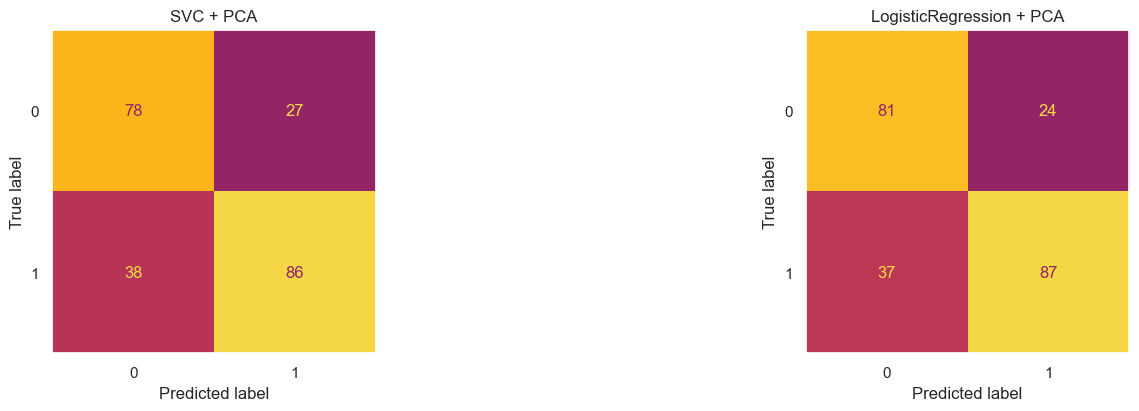

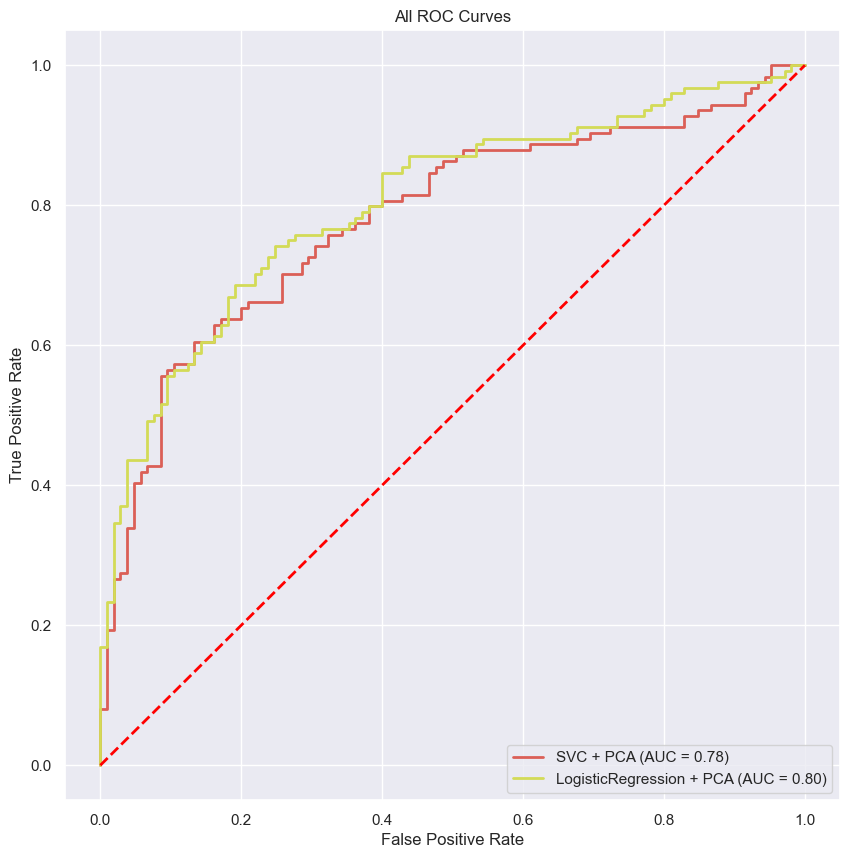

In [646]:
classifiers = {
    'SVC + PCA': SVC(),
    'LogisticRegression + PCA' : LogisticRegression()
}

classifiers_cv = {
    'SVC + PCA': SVC(),
    'LogisticRegression + PCA' : LogisticRegression()
}

cross_validate_models(classifiers_cv, X_pca_train,
                      y_resampled, results=results, cv=3)

results = test_models(classifiers, X_pca_train, X_pca_test,
                      y_resampled, y_test, results)
results.sort_values(by='Accuracy', ascending=False)


In [647]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles
# Create linearly inseparable data

kpca = KernelPCA(kernel="rbf", gamma=15, n_components=8)
X_kernel_pca = kpca.fit_transform(X_resampled)
X_test_kernel_pca = kpca.transform(X_test)

print("Original number of features:", X_resampled.shape[1])
print("Reduced number of features:", X_kernel_pca.shape[1])

Original number of features: 11
Reduced number of features: 8


SVC + KernelPCA... LogisticRegression + KernelPCA... SVC + KernelPCA:DONE; LogisticRegression + KernelPCA:DONE; 

,CV-AUC,CV-Accuracy,CV-F1,AUC,Accuracy,F1
Algorithm,,,,,,
LogisticRegression,0.984625,0.957141,0.955248,0.814516,0.733624,0.740426
LogisticRegression + PCA,0.98005,0.952895,0.951255,0.80361,0.733624,0.740426
SVC,0.993668,0.965715,0.964414,0.787097,0.716157,0.728033
SVC + PCA,0.990969,0.963579,0.962551,0.781336,0.716157,0.725738
SVC + KernelPCA,0.683345,0.520334,0.461318,0.475,0.458515,0.0
LogisticRegression + KernelPCA,0.528678,0.533154,0.091283,0.538057,0.454148,0.0


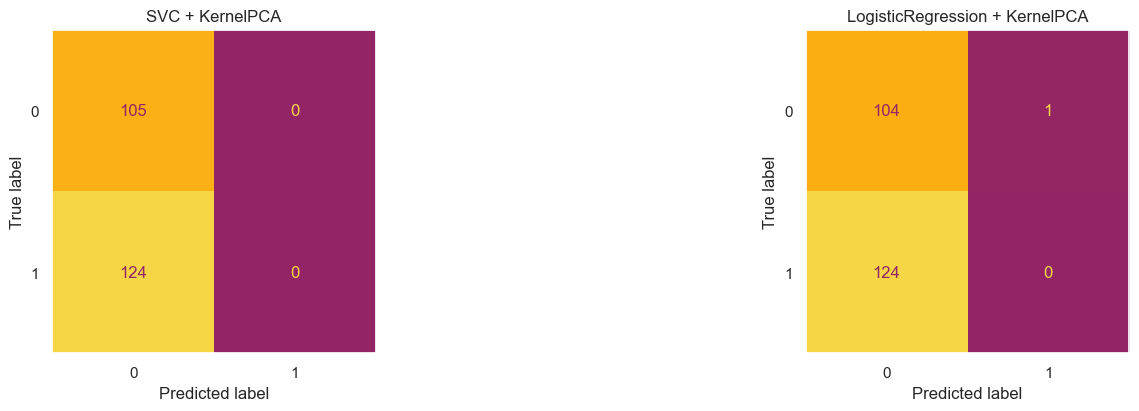

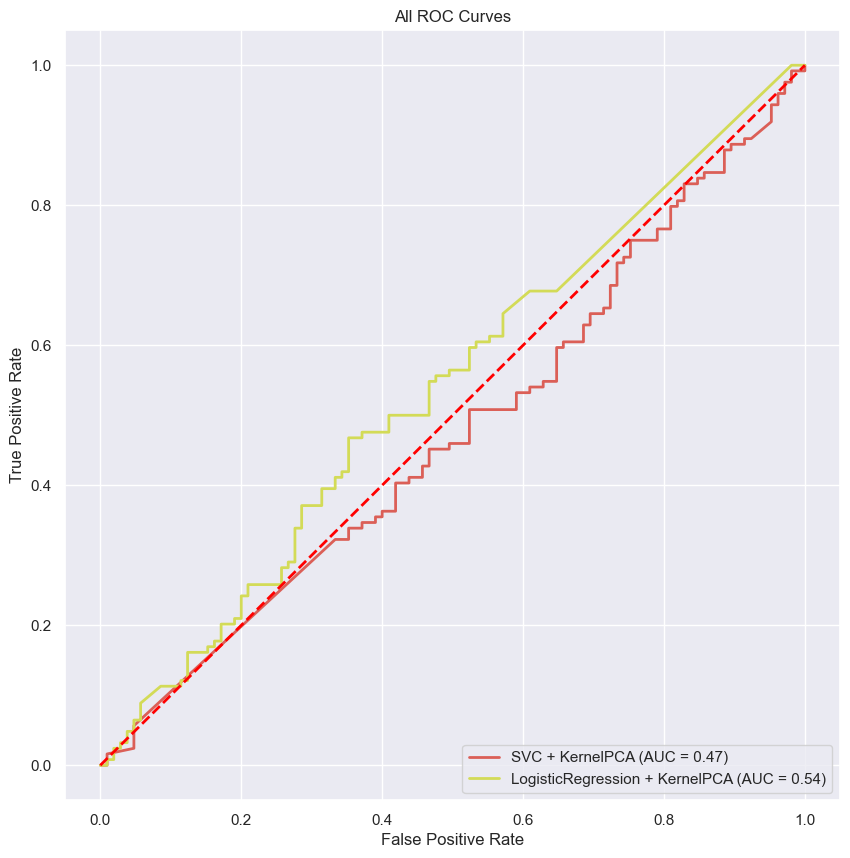

In [648]:
classifiers = {
    'SVC + KernelPCA': SVC(),
    'LogisticRegression + KernelPCA' : LogisticRegression()
}

classifiers_cv = {
    'SVC + KernelPCA': SVC(),
    'LogisticRegression + KernelPCA' : LogisticRegression()
}

cross_validate_models(classifiers_cv, X_kernel_pca,
                      y_resampled, results=results, cv=3)

results = test_models(classifiers, X_kernel_pca, X_test_kernel_pca,
                      y_resampled, y_test, results)
results.sort_values(by='Accuracy', ascending=False)

In [649]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


pipeline = Pipeline([
    ("kpca", KernelPCA()),
    ("svc", SVC())
])

# Define parameter grid for Kernel PCA and SVM
param_grid = {
    "kpca__kernel": ["rbf", "sigmoid", "poly"],
    "kpca__gamma": [0.01, 0.1, 1.0, 10.0],
    "kpca__n_components": [2, 3, 4],
    "svc__C": [0.1, 1, 10, 100]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

# Print the best parameters and best cross-validation score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score (Accuracy):", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Set Accuracy:", test_accuracy)

Best Parameters: {'kpca__gamma': 0.1, 'kpca__kernel': 'sigmoid', 'kpca__n_components': 4, 'svc__C': 100}
Best Cross-Validation Score (Accuracy): 0.739632498648892
Test Set Accuracy: 0.7074235807860262


In [650]:
from sklearn.decomposition import PCA, KernelPCA

kpca = KernelPCA(kernel="poly", gamma=0.01, n_components=4)
X_kernel_pca = kpca.fit_transform(X_resampled)
X_test_kernel_pca = kpca.transform(X_test)

print("Original number of features:", X_resampled.shape[1])
print("Reduced number of features:", X_kernel_pca.shape[1])

Original number of features: 11
Reduced number of features: 4


SVC + KernelPCA... LogisticRegression + KernelPCA... SVC + KernelPCA:DONE; LogisticRegression + KernelPCA:DONE; 

,CV-AUC,CV-Accuracy,CV-F1,AUC,Accuracy,F1
Algorithm,,,,,,
LogisticRegression,0.984625,0.957141,0.955248,0.814516,0.733624,0.740426
LogisticRegression + PCA,0.98005,0.952895,0.951255,0.80361,0.733624,0.740426
LogisticRegression + KernelPCA,0.967018,0.884367,0.874919,0.793395,0.69869,0.687783
SVC,0.993668,0.965715,0.964414,0.787097,0.716157,0.728033
SVC + PCA,0.990969,0.963579,0.962551,0.781336,0.716157,0.725738
SVC + KernelPCA,0.976584,0.90579,0.902102,0.76129,0.694323,0.70339


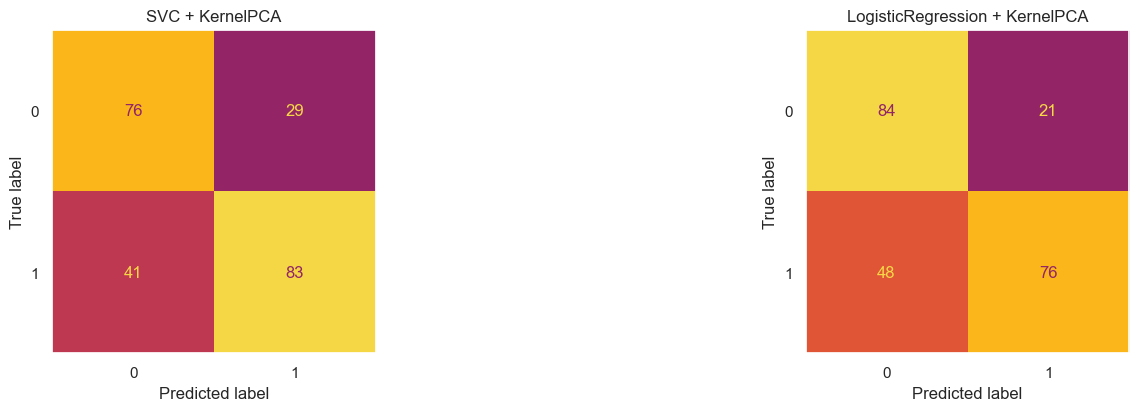

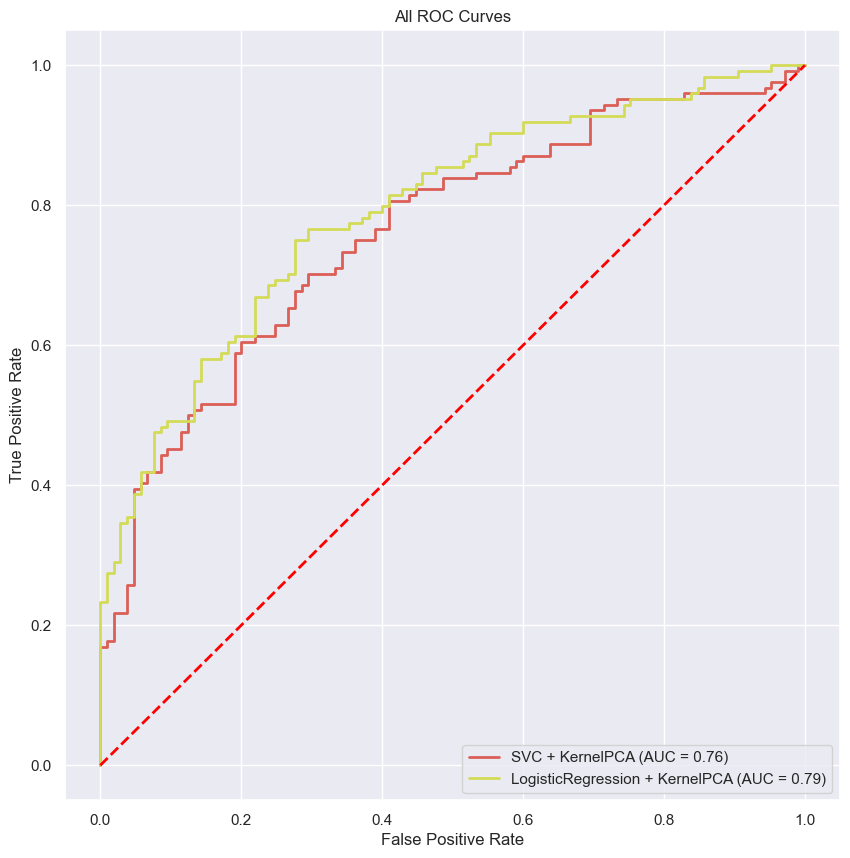

In [651]:
classifiers = {
    'SVC + KernelPCA': SVC(),
    'LogisticRegression + KernelPCA' : LogisticRegression()
}

classifiers_cv = {
    'SVC + KernelPCA': SVC(),
    'LogisticRegression + KernelPCA' : LogisticRegression()
}

cross_validate_models(classifiers_cv, X_kernel_pca,
                      y_resampled, results=results, cv=3)

results = test_models(classifiers, X_kernel_pca, X_test_kernel_pca,
                      y_resampled, y_test, results)
results.sort_values(by='AUC', ascending=False)

In [652]:
def select_n_components(var_ratio, goal_var):
    total_variance = 0.0
    n_components = 0
    
    for explained_variance in var_ratio:
        total_variance += explained_variance
        n_components += 1
        if total_variance >= goal_var:
            break

    return n_components

In [653]:
from sklearn.decomposition import TruncatedSVD


svd = TruncatedSVD(n_components=X_train.shape[1] - 1)
X_train_svd = svd.fit(X_train)

explained_variance_ratio = svd.explained_variance_ratio_

n_components = select_n_components(explained_variance_ratio, 0.95)

svd2 = TruncatedSVD(n_components=n_components)

# Transform both the training and test data to the selected number of components
X_train_svd_selected = svd2.fit_transform(X_train)
X_test_svd_selected = svd2.transform(X_test)

# Print the number of components selected
print(f"Number of components selected: {n_components}")

Number of components selected: 9


In [654]:
print(f'{X_train_svd_selected.shape} i {X_test_svd_selected.shape}')

(914, 9) i (229, 9)


SVC + TSVD... LogisticRegression + TSVD... SVC + TSVD:DONE; LogisticRegression + TSVD:DONE; 

,CV-AUC,CV-Accuracy,CV-F1,AUC,Accuracy,F1
Algorithm,,,,,,
SVC + TSVD,0.833909,0.763636,0.781494,0.810292,0.742358,0.757202
LogisticRegression + TSVD,0.819544,0.76694,0.785478,0.812442,0.737991,0.752066
LogisticRegression,0.984625,0.957141,0.955248,0.814516,0.733624,0.740426
LogisticRegression + PCA,0.98005,0.952895,0.951255,0.80361,0.733624,0.740426
SVC,0.993668,0.965715,0.964414,0.787097,0.716157,0.728033
SVC + PCA,0.990969,0.963579,0.962551,0.781336,0.716157,0.725738
LogisticRegression + KernelPCA,0.967018,0.884367,0.874919,0.793395,0.69869,0.687783
SVC + KernelPCA,0.976584,0.90579,0.902102,0.76129,0.694323,0.70339


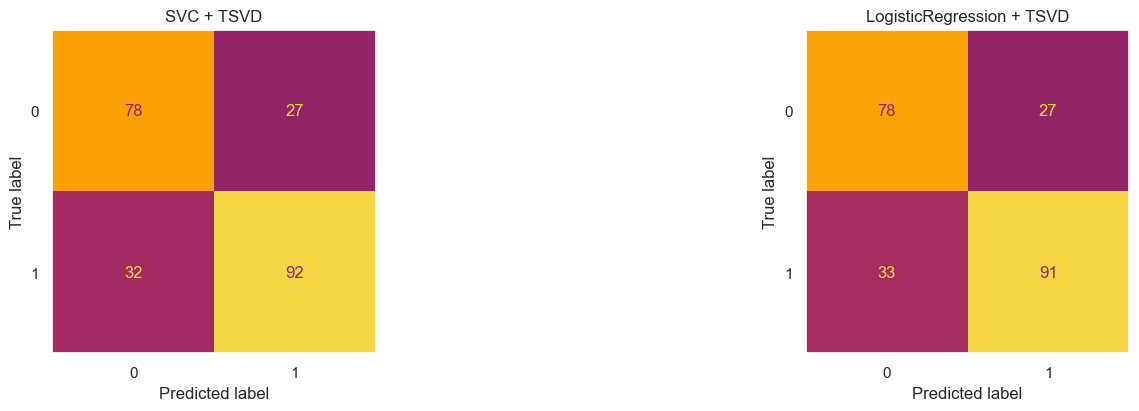

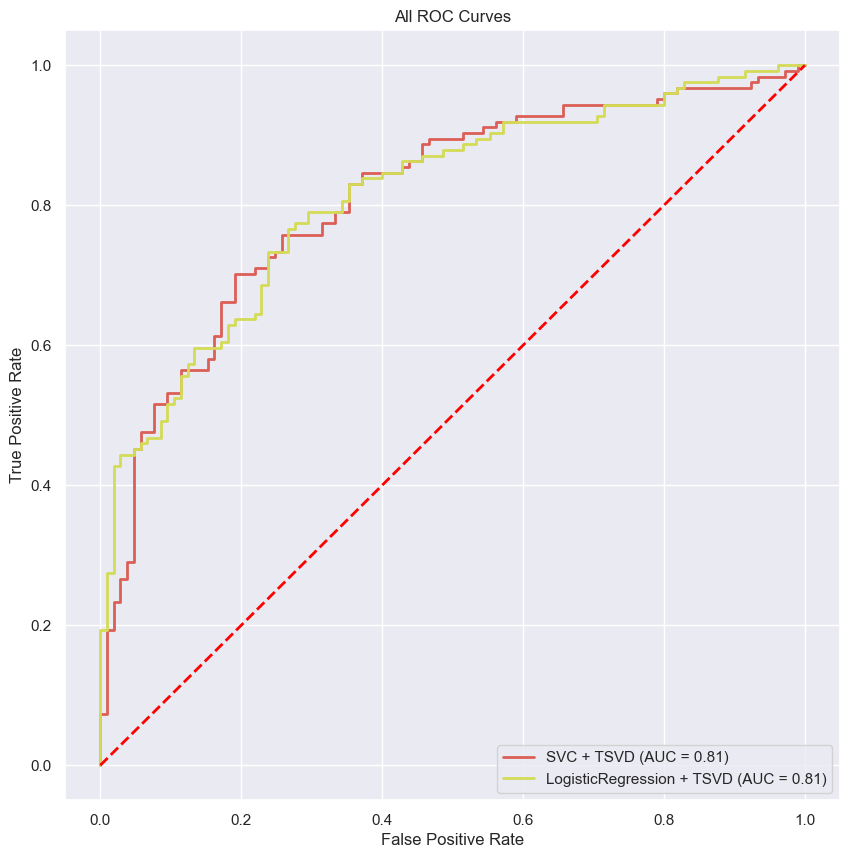

In [655]:
classifiers = {
    'SVC + TSVD': SVC(),
    'LogisticRegression + TSVD' : LogisticRegression()
}

classifiers_cv = {
    'SVC + TSVD': SVC(),
    'LogisticRegression + TSVD' : LogisticRegression()
}

cross_validate_models(classifiers_cv, X_train_svd_selected,
                      y_train, results=results, cv=3)

results = test_models(classifiers, X_train_svd_selected, X_test_svd_selected,
                      y_train, y_test, results)
results.sort_values(by='Accuracy', ascending=False)

In [656]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


lda = LinearDiscriminantAnalysis(n_components=None)
X_lda = lda.fit(X_train,y_train)

lda_var_ratios = lda.explained_variance_ratio_

n_components = select_n_components(lda_var_ratios,0.95)

lda2 = LinearDiscriminantAnalysis(n_components=n_components)


X_train_lda_selected = lda2.fit_transform(X_train,y_train)
X_test_lda_selected = lda2.transform(X_test)

# Print the number of components selected
print(f"Number of components selected: {n_components}")


Number of components selected: 1


In [657]:
print(f'{X_test_lda_selected.shape} ii {X_train_lda_selected.shape}')

(229, 1) ii (914, 1)


SVC + LDA... LogisticRegression + LDA... SVC + LDA:DONE; LogisticRegression + LDA:DONE; 

,CV-AUC,CV-Accuracy,CV-F1,AUC,Accuracy,F1
Algorithm,,,,,,
SVC + LDA,0.808034,0.760354,0.777502,0.781336,0.751092,0.767347
LogisticRegression + LDA,0.831886,0.757071,0.773427,0.817051,0.751092,0.767347
SVC + TSVD,0.833909,0.763636,0.781494,0.810292,0.742358,0.757202
LogisticRegression + TSVD,0.819544,0.76694,0.785478,0.812442,0.737991,0.752066
LogisticRegression,0.984625,0.957141,0.955248,0.814516,0.733624,0.740426
LogisticRegression + PCA,0.98005,0.952895,0.951255,0.80361,0.733624,0.740426
SVC,0.993668,0.965715,0.964414,0.787097,0.716157,0.728033
SVC + PCA,0.990969,0.963579,0.962551,0.781336,0.716157,0.725738
LogisticRegression + KernelPCA,0.967018,0.884367,0.874919,0.793395,0.69869,0.687783


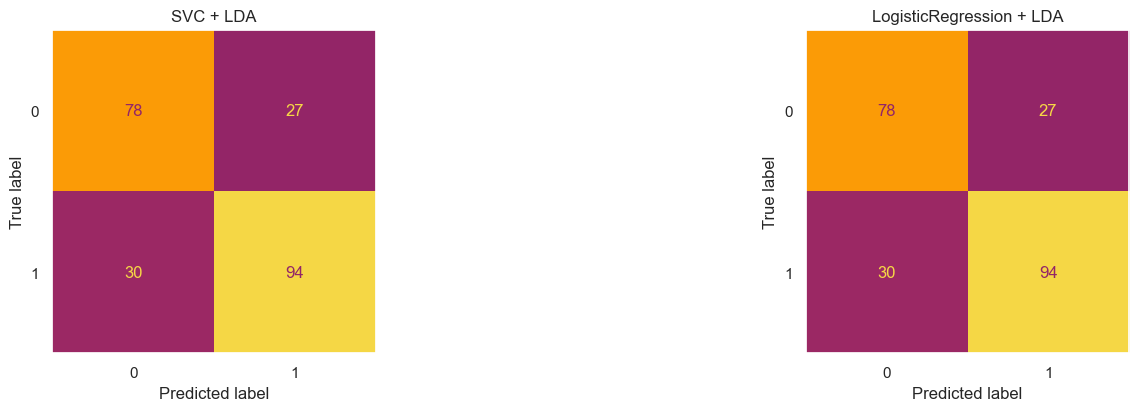

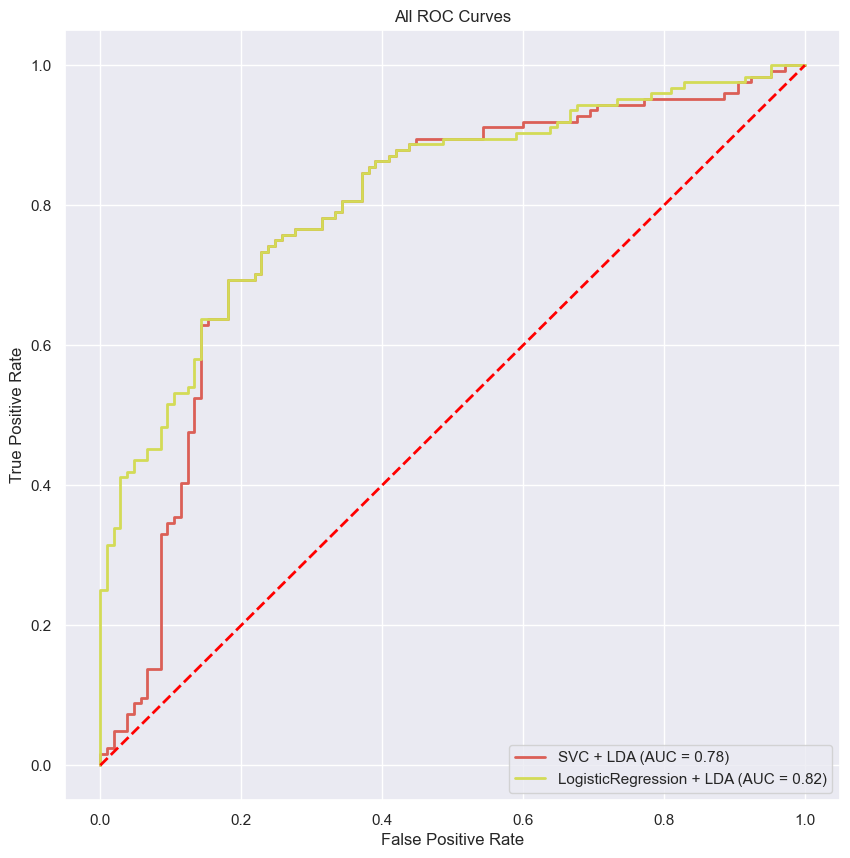

In [658]:
classifiers = {
    'SVC + LDA': SVC(),
    'LogisticRegression + LDA' : LogisticRegression()
}

classifiers_cv = {
    'SVC + LDA': SVC(),
    'LogisticRegression + LDA' : LogisticRegression()
}

cross_validate_models(classifiers_cv, X_train_lda_selected,
                      y_train, results=results, cv=3)

results = test_models(classifiers, X_train_lda_selected, X_test_lda_selected,
                      y_train, y_test, results)
results.sort_values(by='Accuracy', ascending=False)

In [659]:
tsne= TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3)
X_tsne_train = tsne.fit_transform(X_train)
X_tsne_test = tsne.fit_transform(X_test)

print(X_tsne_train.shape)

(914, 2)


SVC + TSNE... LogisticRegression + TSNE... SVC + TSNE:DONE; LogisticRegression + TSNE:DONE; 

,CV-AUC,CV-Accuracy,CV-F1,AUC,Accuracy,F1
Algorithm,,,,,,
SVC + LDA,0.808034,0.760354,0.777502,0.781336,0.751092,0.767347
LogisticRegression + LDA,0.831886,0.757071,0.773427,0.817051,0.751092,0.767347
SVC + TSVD,0.833909,0.763636,0.781494,0.810292,0.742358,0.757202
LogisticRegression + TSVD,0.819544,0.76694,0.785478,0.812442,0.737991,0.752066
LogisticRegression,0.984625,0.957141,0.955248,0.814516,0.733624,0.740426
LogisticRegression + PCA,0.98005,0.952895,0.951255,0.80361,0.733624,0.740426
SVC,0.993668,0.965715,0.964414,0.787097,0.716157,0.728033
SVC + PCA,0.990969,0.963579,0.962551,0.781336,0.716157,0.725738
LogisticRegression + KernelPCA,0.967018,0.884367,0.874919,0.793395,0.69869,0.687783


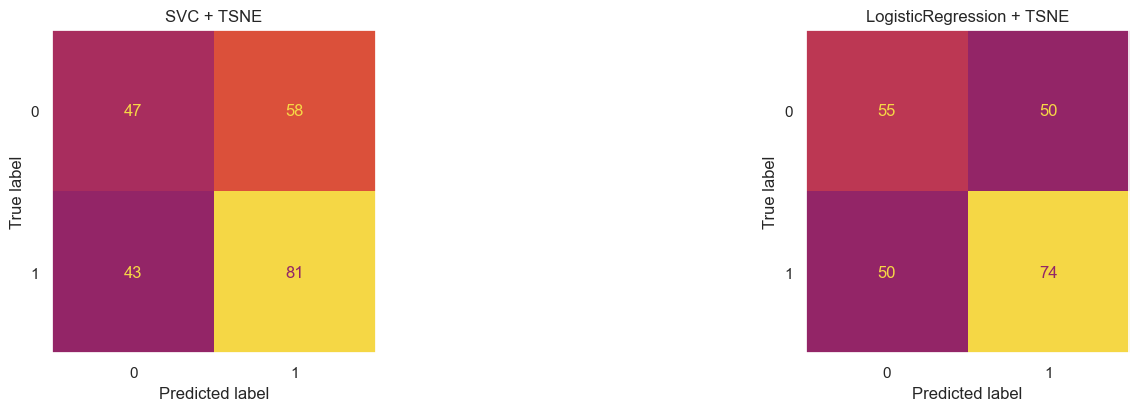

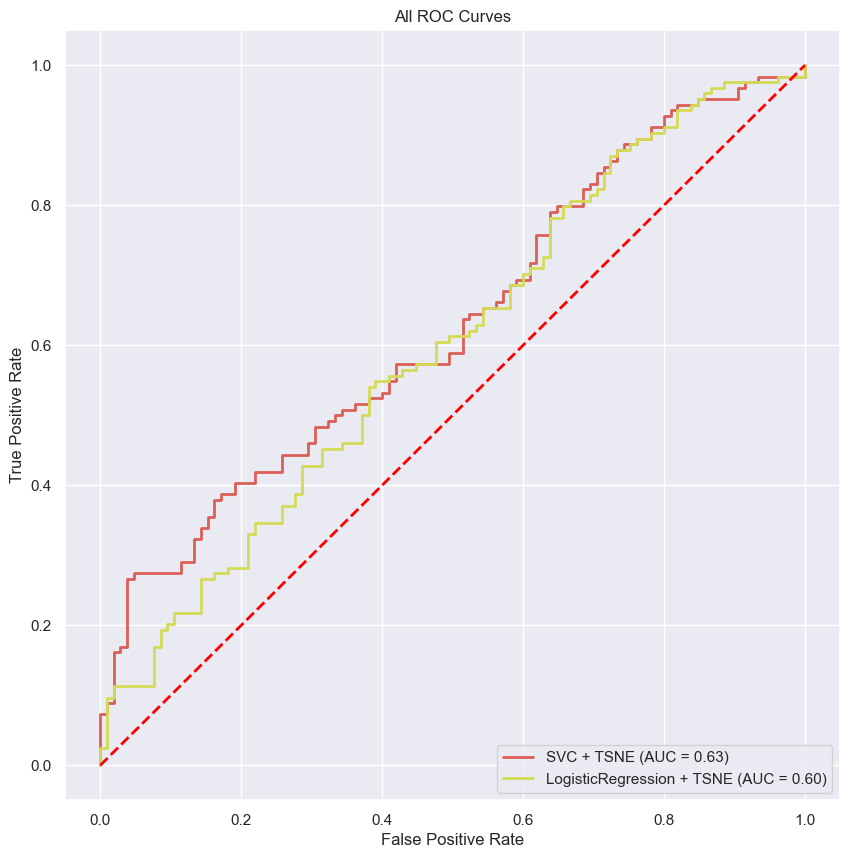

In [660]:
classifiers = {
    'SVC + TSNE': SVC(),
    'LogisticRegression + TSNE' : LogisticRegression()
}

classifiers_cv = {
    'SVC + TSNE': SVC(),
    'LogisticRegression + TSNE' : LogisticRegression()
}

cross_validate_models(classifiers_cv, X_tsne_train,
                      y_train, results=results, cv=3)

results = test_models(classifiers, X_tsne_train, X_tsne_test,
                      y_train, y_test, results)
results.sort_values(by='Accuracy', ascending=False)

SVC + LLE... LogisticRegression + LLE... SVC + LLE:DONE; LogisticRegression + LLE:DONE; 

,CV-AUC,CV-Accuracy,CV-F1,AUC,Accuracy,F1
Algorithm,,,,,,
SVC + LDA,0.808034,0.760354,0.777502,0.781336,0.751092,0.767347
LogisticRegression + LDA,0.831886,0.757071,0.773427,0.817051,0.751092,0.767347
SVC + TSVD,0.833909,0.763636,0.781494,0.810292,0.742358,0.757202
LogisticRegression + TSVD,0.819544,0.76694,0.785478,0.812442,0.737991,0.752066
LogisticRegression,0.984625,0.957141,0.955248,0.814516,0.733624,0.740426
LogisticRegression + PCA,0.98005,0.952895,0.951255,0.80361,0.733624,0.740426
SVC,0.993668,0.965715,0.964414,0.787097,0.716157,0.728033
SVC + PCA,0.990969,0.963579,0.962551,0.781336,0.716157,0.725738
LogisticRegression + KernelPCA,0.967018,0.884367,0.874919,0.793395,0.69869,0.687783


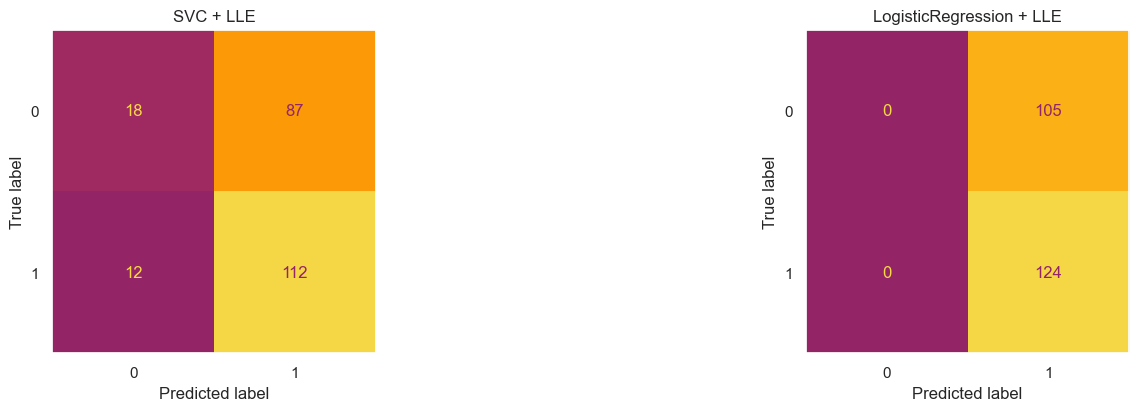

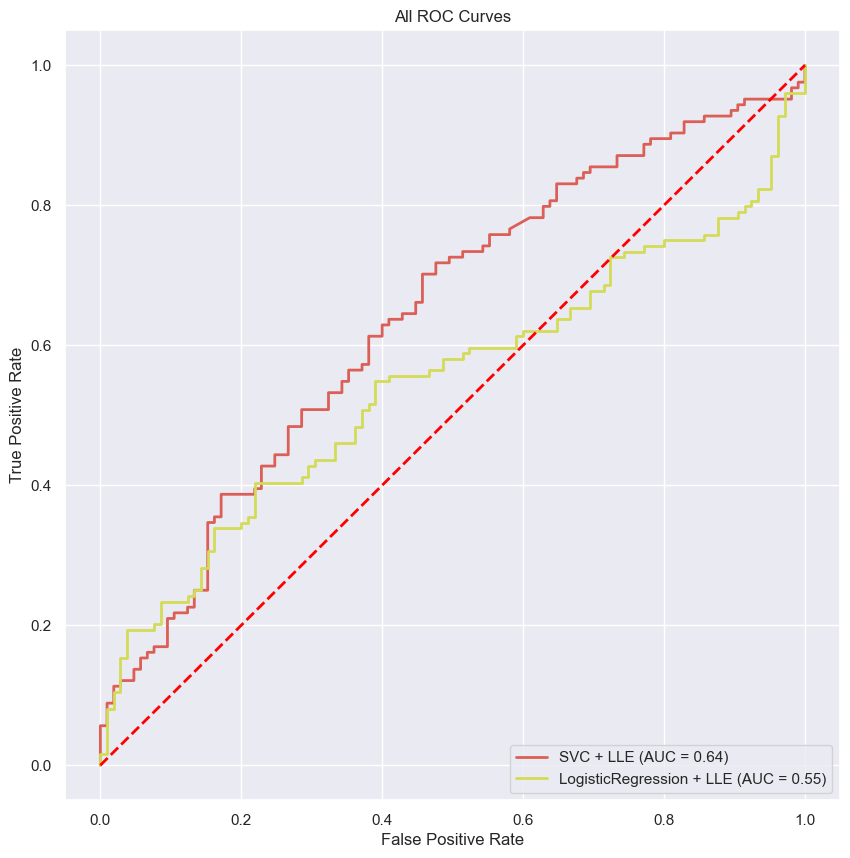

In [661]:
lle = LocallyLinearEmbedding(n_neighbors=5, n_components=2)
X_lle = lle.fit_transform(X_train)
X_lle_test = lle.fit_transform(X_test)

classifiers = {
    'SVC + LLE': SVC(),
    'LogisticRegression + LLE' : LogisticRegression()
}

classifiers_cv = {
    'SVC + LLE': SVC(),
    'LogisticRegression + LLE' : LogisticRegression()
}

cross_validate_models(classifiers_cv, X_lle,
                      y_train, results=results, cv=3)

results = test_models(classifiers, X_lle, X_lle_test,
                      y_train, y_test, results)
results.sort_values(by='Accuracy', ascending=False)

In [685]:
norm = Normalizer()
df2[numerical_data] = norm.fit_transform(df2[numerical_data])

In [686]:
df2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,0.308173,0.275056,0.245305,0.102982,0.118894,0.205904,0.132674,0.466143,0.439090,0.185026,0.299406,0.543307
std,0.116804,0.124532,0.162378,0.067358,0.060224,0.132956,0.102306,0.111258,0.132301,0.082297,0.148804,0.498339
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.228641,0.172357,0.092849,0.068502,0.091437,0.095043,0.052282,0.406329,0.350151,0.132933,0.177846,0.000000
50%,0.299306,0.267323,0.250601,0.086326,0.109385,0.185696,0.106864,0.490310,0.445001,0.169965,0.268091,1.000000
75%,0.383553,0.360031,0.382551,0.110420,0.128055,0.289111,0.182277,0.544240,0.540306,0.219742,0.396530,1.000000
max,0.686301,0.755748,0.586575,0.638311,0.649918,0.688377,0.621505,0.695849,0.764602,0.707203,0.768096,1.000000


In [688]:
X2 = df2.drop('quality', axis=1)
y2 = df2['quality']

In [689]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y2, test_size=0.2, stratify=y2)

SVC + NMF... LogisticRegression + NMF... SVC + NMF:DONE; LogisticRegression + NMF:DONE; 

,CV-AUC,CV-Accuracy,CV-F1,AUC,Accuracy,F1
Algorithm,,,,,,
LogisticRegression + LDA,0.831886,0.757071,0.773427,0.817051,0.751092,0.767347
LogisticRegression,0.984625,0.957141,0.955248,0.814516,0.733624,0.740426
SVC + NMF,0.834297,0.751607,0.772663,0.813825,0.755459,0.772358
LogisticRegression + TSVD,0.819544,0.76694,0.785478,0.812442,0.737991,0.752066
SVC + TSVD,0.833909,0.763636,0.781494,0.810292,0.742358,0.757202
LogisticRegression + PCA,0.98005,0.952895,0.951255,0.80361,0.733624,0.740426
LogisticRegression + KernelPCA,0.967018,0.884367,0.874919,0.793395,0.69869,0.687783
SVC,0.993668,0.965715,0.964414,0.787097,0.716157,0.728033
SVC + PCA,0.990969,0.963579,0.962551,0.781336,0.716157,0.725738


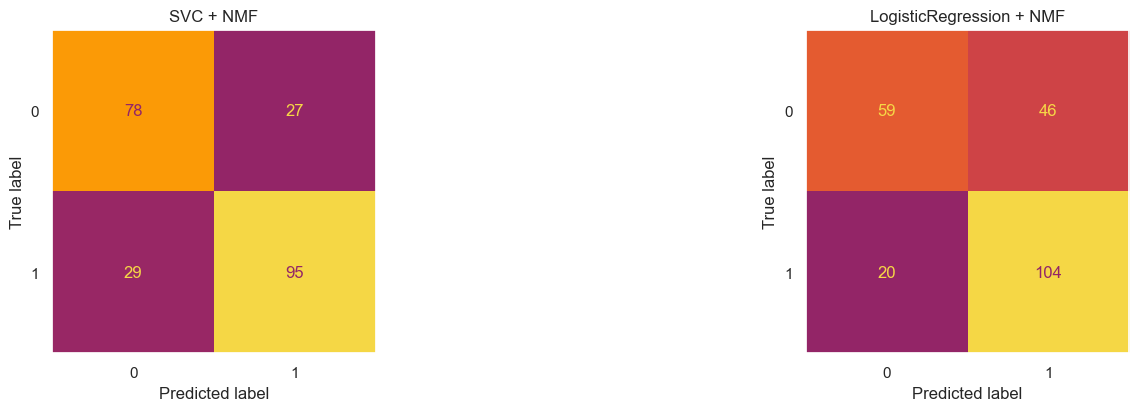

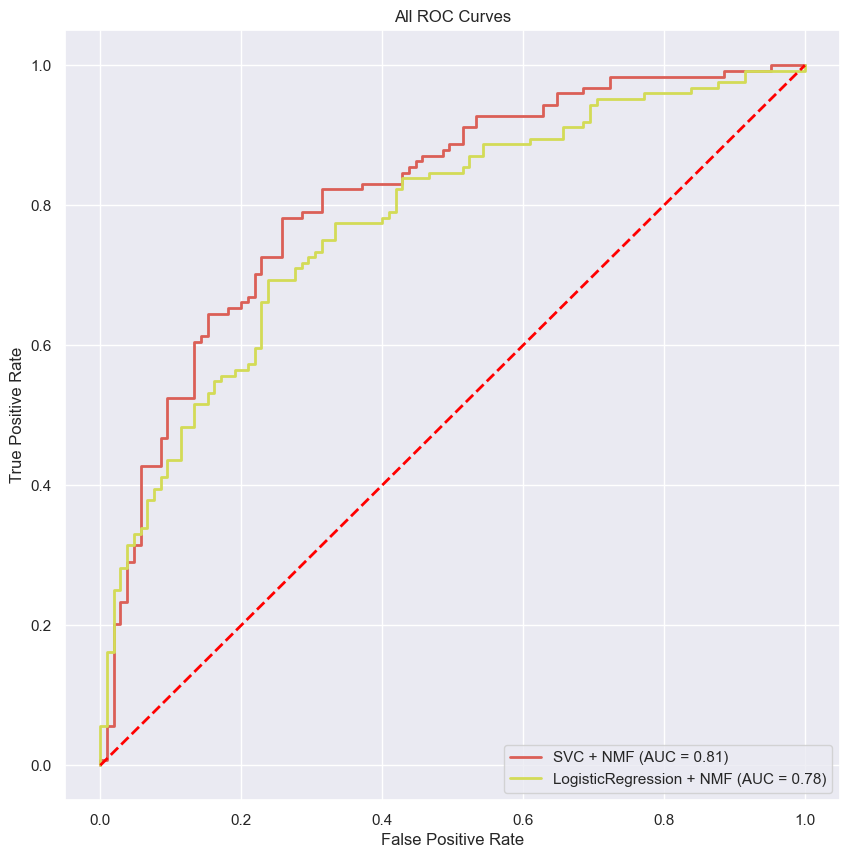

In [691]:
nmf = NMF(n_components=8, random_state=1)

X_train_nmf = nmf.fit_transform(X_train2)
X_test_nmf = nmf.transform(X_test2)

classifiers = {
    'SVC + NMF': SVC(),
    'LogisticRegression + NMF' : LogisticRegression()
}

classifiers_cv = {
    'SVC + NMF': SVC(),
    'LogisticRegression + NMF' : LogisticRegression()
}

cross_validate_models(classifiers_cv, X_train_nmf,
                      y_train2, results=results, cv=3)

results = test_models(classifiers, X_train_nmf, X_test_nmf,
                      y_train2, y_test2, results)
results.sort_values(by='AUC', ascending=False)